In [1]:
import warnings
warnings.filterwarnings("ignore", message="FP16 is not supported on CPU; using FP32 instead")# to ignore warning 


In [2]:
import matplotlib as plt
import seaborn as sns

In [3]:
import os

audio_folder = "/Users/chhavigupta/Downloads/Voice_samples/PhishingVoiceDataset"
audio_files = []

for root, dirs, files in os.walk(audio_folder):
    for file in files:
        if file.endswith('.mp3'):
            full_path = os.path.join(root, file)
            relative_path = os.path.relpath(full_path, audio_folder)
            audio_files.append(relative_path)

# Print results
for i, f in enumerate(audio_files):
    print(f"{i}. {f}")



0. NonPhishing/7.mp3
1. NonPhishing/6.mp3
2. NonPhishing/40.mp3
3. NonPhishing/4.mp3
4. NonPhishing/5.mp3
5. NonPhishing/1.mp3
6. NonPhishing/2.mp3
7. NonPhishing/3.mp3
8. NonPhishing/22.mp3
9. NonPhishing/36.mp3
10. NonPhishing/37.mp3
11. NonPhishing/23.mp3
12. NonPhishing/35.mp3
13. NonPhishing/21.mp3
14. NonPhishing/20.mp3
15. NonPhishing/34.mp3
16. NonPhishing/30.mp3
17. NonPhishing/24.mp3
18. NonPhishing/18.mp3
19. NonPhishing/19.mp3
20. NonPhishing/25.mp3
21. NonPhishing/31.mp3
22. NonPhishing/27.mp3
23. NonPhishing/33.mp3
24. NonPhishing/32.mp3
25. NonPhishing/26.mp3
26. NonPhishing/17.mp3
27. NonPhishing/16.mp3
28. NonPhishing/28.mp3
29. NonPhishing/14.mp3
30. NonPhishing/15.mp3
31. NonPhishing/29.mp3
32. NonPhishing/11.mp3
33. NonPhishing/39.mp3
34. NonPhishing/38.mp3
35. NonPhishing/10.mp3
36. NonPhishing/12.mp3
37. NonPhishing/13.mp3
38. NonPhishing/8.mp3
39. NonPhishing/9.mp3
40. Phishing/7.mp3
41. Phishing/6.mp3
42. Phishing/40.mp3
43. Phishing/4.mp3
44. Phishing/5.mp3
45.

In [4]:
import whisper

model = whisper.load_model("tiny")#load_model("base") will load pre trained whisper model base and also base has better accuracy then tiny

def transcribe_audio(file_path):
    result = model.transcribe(file_path)  # Transcribes the audio file
    return result['text']  # Extracts only the text (transcript)


In [5]:
import language_tool_python #is used to check spelling ,grammar and style in  english 
tool = language_tool_python.LanguageTool('en-US')
def get_grammar_score(text):
    matches = tool.check(text)#finds grammar/spelling issues
    num_errors = len(matches)#how many grammar issues
    words = len(text.split())#how many words in a text
    if words == 0:                      
        return 0, num_errors, matches
    score = max(0, 100 - (num_errors / words) * 100)#calculate grammar score 0 to 100
    return round(score,2),num_errors,matches

In [6]:
results = []

for file in audio_files:
    path = os.path.join(audio_folder, file)  
    transcript = transcribe_audio(path)
    score, errors, matches = get_grammar_score(transcript)

    results.append({
        "file": file,
        "transcript": transcript,
        "grammar_score": score,
        "errors": errors
    })


In [27]:
import pandas as pd

df = pd.DataFrame(results)
df.sort_values(by="grammar_score",inplace=True)#inplace = True is used to directly modify dataframe without making copy of it
df.head()

,file,transcript,grammar_score,errors
25,NonPhishing/26.mp3,Your Zen Renewa Compassword has been set.,71.43,2
55,Phishing/34.mp3,Unplained refund available from Zenra. Click ...,83.33,2
61,Phishing/31.mp3,"Immuniat action required, verify your identit...",84.62,2
23,NonPhishing/33.mp3,Your recent Zenra account transfer was comple...,85.71,1
27,NonPhishing/16.mp3,Thank you for enrolling in Zenra Estatements....,85.71,2


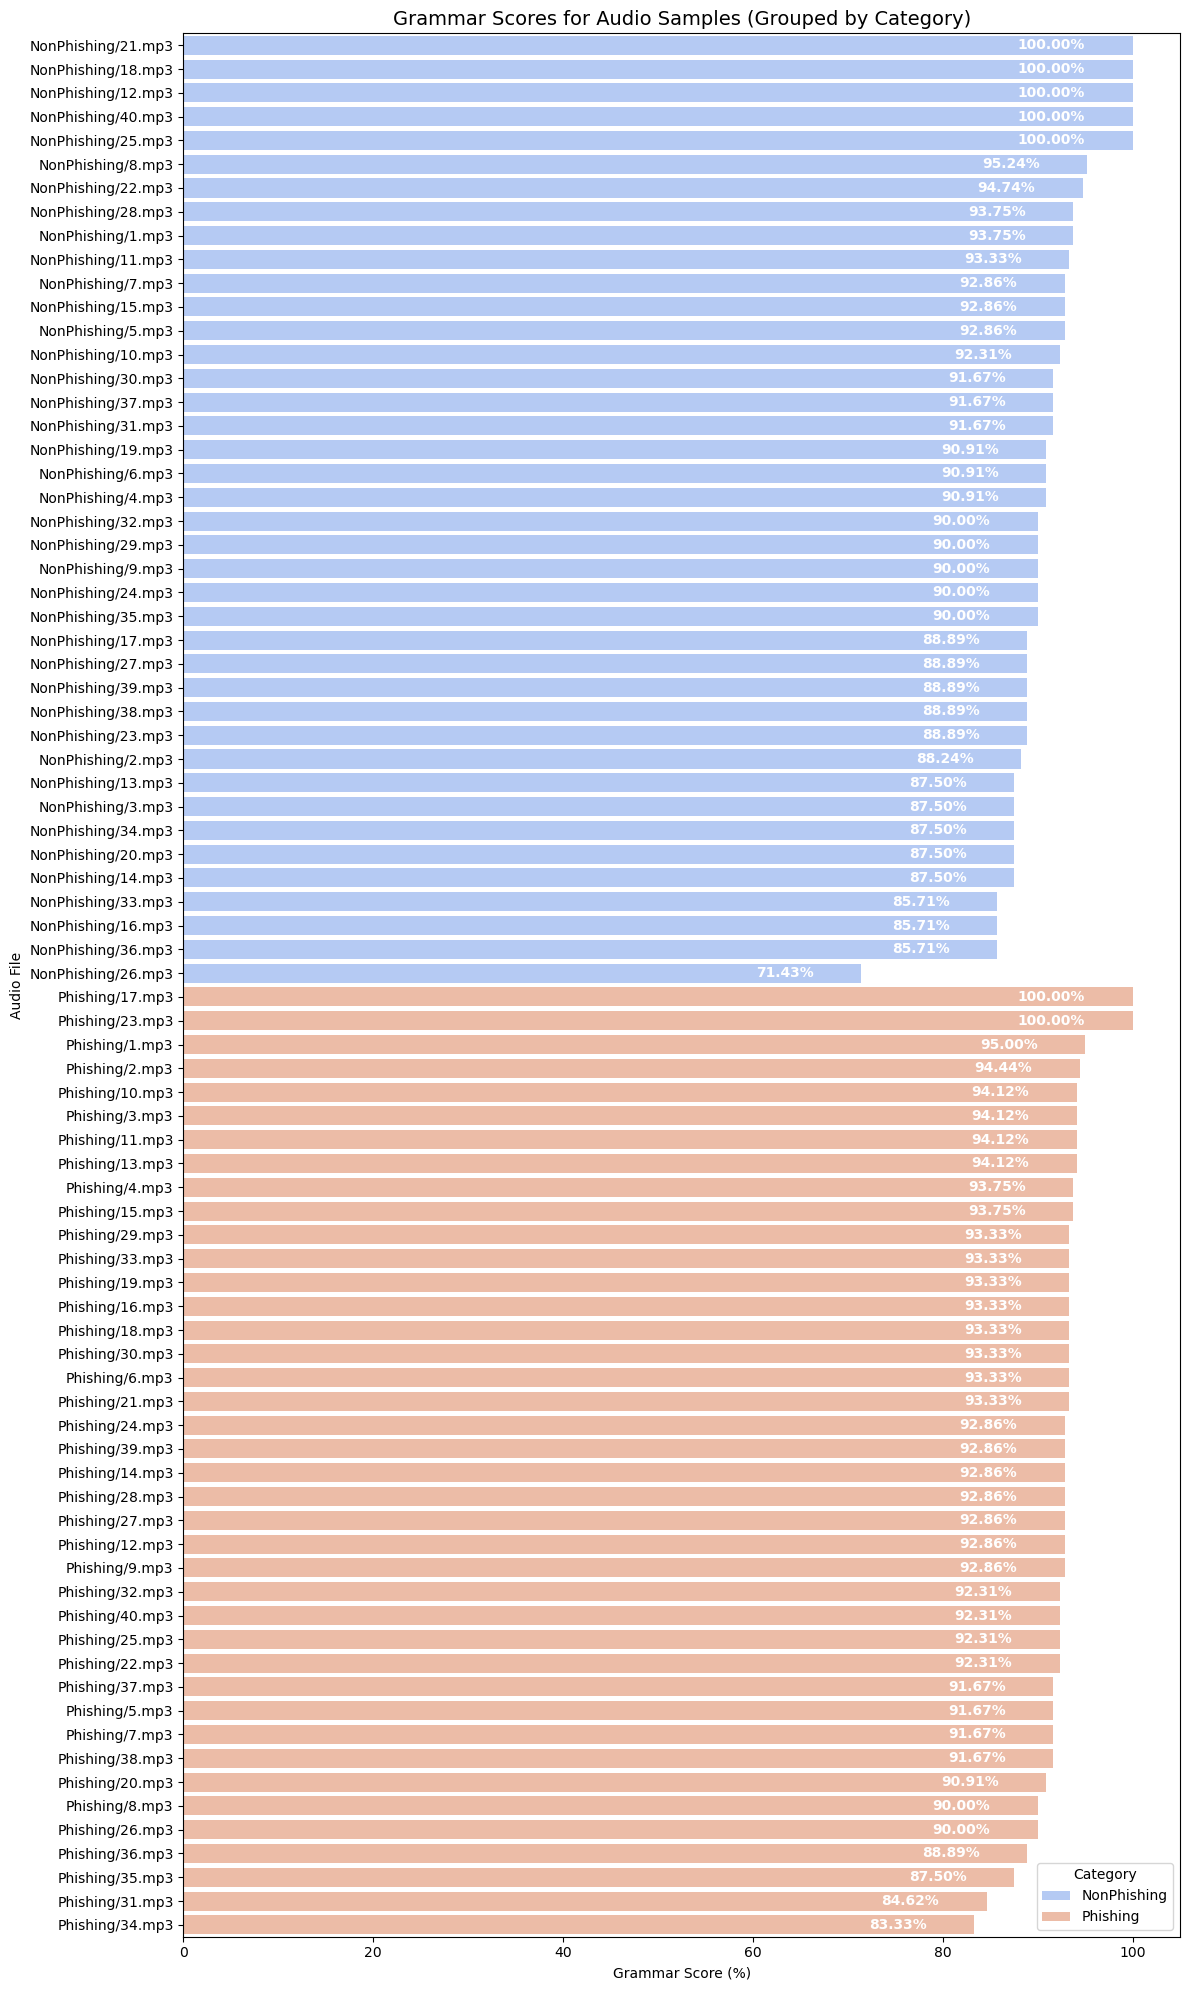

In [41]:

import seaborn as sns
import matplotlib.pyplot as plt

df['category'] = df['file'].apply(lambda x: x.split('/')[0])#phishing/10.mp3.split('/') will return [phishing,10.mp3] and [0] will return only[phishing]

df_sorted = df.sort_values(by=['category', 'grammar_score'], ascending=[True,False])

plt.figure(figsize=(12, 20))

barplot = sns.barplot(x="grammar_score", y="file", data=df_sorted, palette="coolwarm", hue="category", dodge=False)
for i, (score, file_name) in enumerate(zip(df_sorted['grammar_score'], df_sorted['file'])):
    plt.text(score - 5, i, f"{score:.2f}%", color='white', va='center', ha='right', fontweight='bold')

plt.title("Grammar Scores for Audio Samples (Grouped by Category)", fontsize=14)
plt.xlabel("Grammar Score (%)")
plt.ylabel("Audio File")
plt.legend(title='Category', loc='lower right')
plt.tight_layout()#it automatically adjust spacing
plt.show()

